# Лабораторная работа №3 (Проведение исследований с решающим деревом)

## 2. Создание бейзлайна и оценка качества

Перейдем к созданию базовых моделей

### Классификация

Загрузим датасет и посмотрим на данные

In [1]:
import pandas as pd

df_class = pd.read_csv('data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

print(f"Размерность данных")
print(df_class.shape)
print(f"\nИнформация о данных")
print(df_class.info())
print(f"\nПервые 5 строк")
print(df_class.head())
print(f"\nРаспределение классов")
print(df_class['class'].value_counts())

Размерность данных
(10000, 18)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)

Выделим исходные признаки, которые непосредственно описывают физические свойства объектов и целевую переменную. А также закодируем таргет, так как это категориальный признак.

In [2]:
from sklearn.preprocessing import LabelEncoder

X_class = df_class[['u', 'g', 'r', 'i', 'z', 'redshift']]
y_class = df_class['class']

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
class_names = le.classes_

Разделим данные на выборку для обучения и тестовую выборку.

In [3]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42
)

Обучим базовую модель DecisionTree и выполним предсказания на тестовой выборке.

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_class, y_train_class)

y_pred_class = dt_classifier.predict(X_test_class)

Опишем функцию, которая будет использоваться для оценки обученной модели классификации.

1. Accuracy: 0.9885

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.986042 0.992972  0.989495
   QSO   0.957219 0.942105  0.949602
  STAR   0.998765 0.993857  0.996305

3. Macro F1: 0.9785

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     989    6     1
QSO         11  179     0
STAR         3    2   809


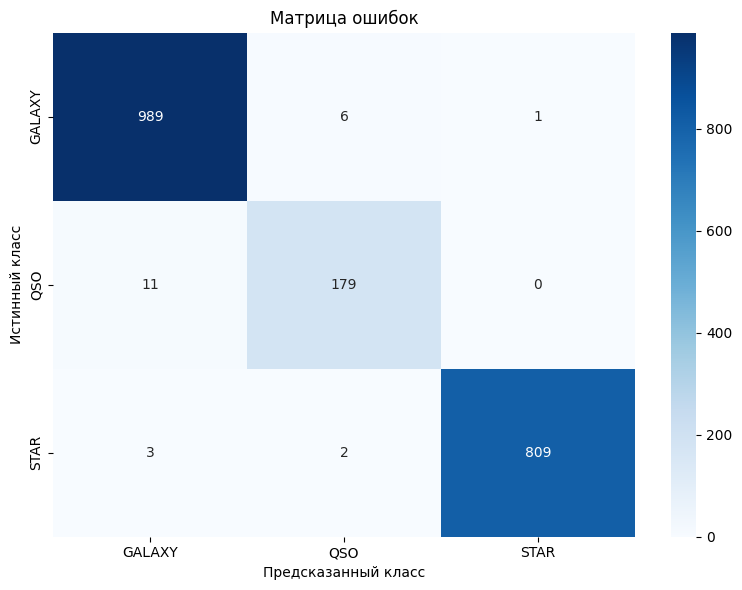

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)

def evaluate_classification_model(y_true, y_pred, class_names):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"1. Accuracy: {accuracy:.4f}")
    
    print(f"\n2. Метрики по классам:")
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    metrics_df = pd.DataFrame({
        'Класс': class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })
    print(metrics_df.to_string(index=False))
    
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n3. Macro F1: {macro_f1:.4f}")
    
    print(f"\n4. Матрица ошибок:")
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print(cm_df)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Матрица ошибок')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'macro_f1': macro_f1,
        'confusion_matrix': cm
    }

class_metrics = evaluate_classification_model(y_test_class, y_pred_class, class_names)

### Регрессия

Загрузим датасет и посмотрим на данные

In [6]:
df_reg = pd.read_csv('data/abalone.csv')

print(f"Размерность данных")
print(df_reg.shape)
print(f"\nИнформация о данных")
print(df_reg.info())
print(f"\nПервые 5 строк")
print(df_reg.head())
print(f"\nСтатистика по числовым признакам")
print(df_reg.describe())

Размерность данных
(4177, 9)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Первые 5 строк
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.4

Выделим признаки и целевую переменную. Закодируем категориальный признак Sex.

In [7]:
X_reg = df_reg.drop('Rings', axis=1)
y_reg = df_reg['Rings']

le_sex = LabelEncoder()
X_reg_encoded = X_reg.copy()
X_reg_encoded['Sex'] = le_sex.fit_transform(X_reg['Sex'])

Разделим данные на выборку для обучения и тестовую выборку.

In [8]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)

Обучим базовую модель DecisionTree и выполним предсказания на тестовой выборке.

In [9]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = dt_regressor.predict(X_test_reg)

Опишем функцию, которая будет использоваться для оценки обученной модели регрессии.

In [10]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score,
)

def evaluate_regression_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    print(f"1. MAE: {mae:.4f}")

    mse = mean_squared_error(y_true, y_pred)
    print(f"\n2. MSE: {mse:.4f}")
    
    rmse = np.sqrt(mse)
    print(f"\n3. RMSE: {rmse:.4f}")
    
    r2 = r2_score(y_true, y_pred)
    print(f"\n4. R²: {r2:.4f}")
    
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

reg_metrics = evaluate_regression_model(y_test_reg, y_pred_reg)

1. MAE: 2.1782

2. MSE: 9.8194

3. RMSE: 3.1336

4. R²: 0.0929


## 3. Улучшение бейзлайна

Перейдем к формулированию и проверкам гипотез

### Классификация

**Гипотеза 1:** Добавление стандартизации признаков и стратификации при разбиении на выборки улучшит качество модели.

Результаты гипотезы 1:
1. Accuracy: 0.9900

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.986111 0.994000  0.990040
   QSO   0.981366 0.929412  0.954683
  STAR   0.996390 0.997590  0.996990

3. Macro F1: 0.9806

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     994    3     3
QSO         12  158     0
STAR         2    0   828


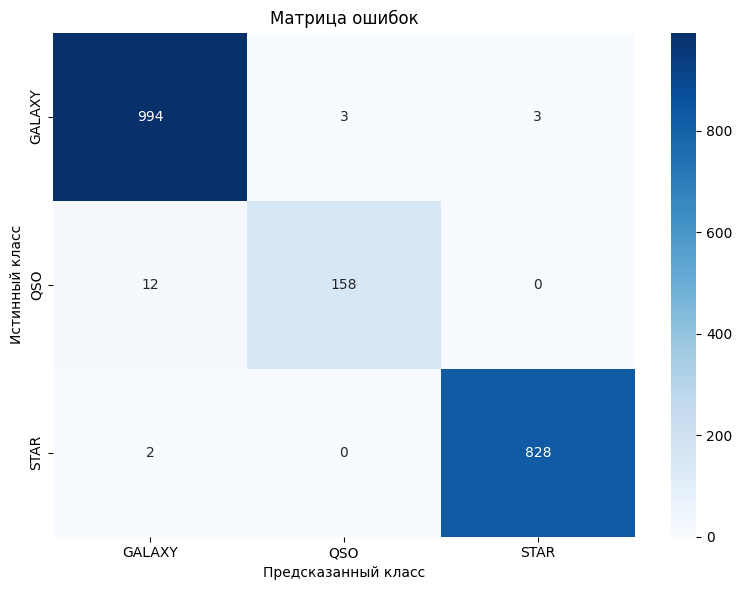

In [11]:
from sklearn.preprocessing import StandardScaler

X_train_class_h1, X_test_class_h1, y_train_class_h1, y_test_class_h1 = train_test_split(
    X_class, y_class_encoded, test_size=0.2, stratify=y_class_encoded, random_state=42
)

scaler_class_h1 = StandardScaler()
X_train_class_h1_scaled = scaler_class_h1.fit_transform(X_train_class_h1)
X_test_class_h1_scaled = scaler_class_h1.transform(X_test_class_h1)

dt_classifier_h1 = DecisionTreeClassifier(random_state=42)
dt_classifier_h1.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_h1 = dt_classifier_h1.predict(X_test_class_h1_scaled)

print("Результаты гипотезы 1:")
class_metrics_h1 = evaluate_classification_model(y_test_class_h1, y_pred_class_h1, class_names)

**Гипотеза 2:** Подбор гиперпараметров на кросс-валидации улучшит качество модели.

Лучшие параметры:
  criterion: gini
  max_depth: 5
  min_samples_leaf: 4
  min_samples_split: 2

Лучший F1-score (кросс-валидация): 0.9787

Результаты гипотезы 2:
1. Accuracy: 0.9905

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.988060 0.993000  0.990524
   QSO   0.975460 0.935294  0.954955
  STAR   0.996394 0.998795  0.997593

3. Macro F1: 0.9810

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     993    4     3
QSO         11  159     0
STAR         1    0   829


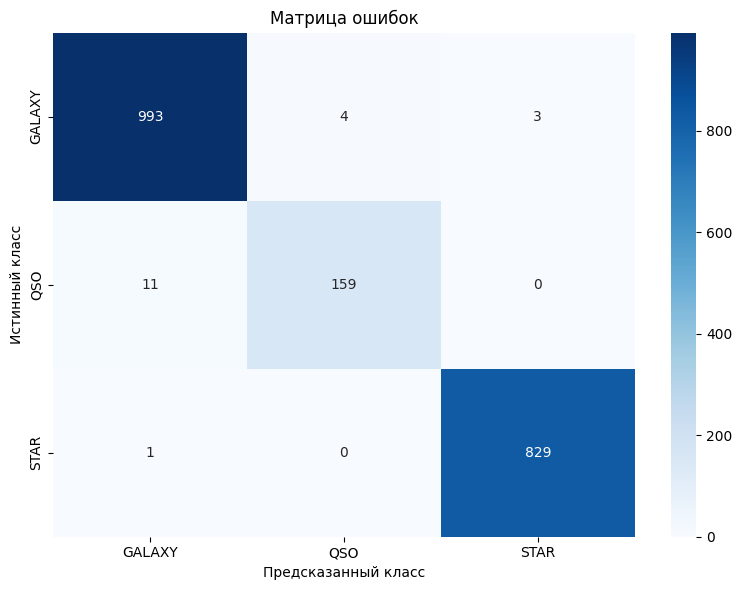

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid_h2 = {
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

dt_for_tuning = DecisionTreeClassifier(random_state=42)
grid_search_h2 = GridSearchCV(
    dt_for_tuning,
    param_grid_h2,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search_h2.fit(X_train_class_h1_scaled, y_train_class_h1)

print("Лучшие параметры:")
for param, value in grid_search_h2.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nЛучший F1-score (кросс-валидация): {grid_search_h2.best_score_:.4f}")

dt_classifier_h2 = DecisionTreeClassifier(
    max_depth=grid_search_h2.best_params_['max_depth'],
    min_samples_split=grid_search_h2.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_h2.best_params_['min_samples_leaf'],
    criterion=grid_search_h2.best_params_['criterion'],
    random_state=42
)
dt_classifier_h2.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_h2 = dt_classifier_h2.predict(X_test_class_h1_scaled)

print("\nРезультаты гипотезы 2:")
class_metrics_h2 = evaluate_classification_model(y_test_class_h1, y_pred_class_h2, class_names)

**Гипотеза 3:** Добавление параметра max_features для ограничения количества признаков при разбиении улучшит качество модели.

Лучшие параметры: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Лучший F1-score на кросс-валидации: 0.9787

Результаты гипотезы 3:
1. Accuracy: 0.9905

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.988060 0.993000  0.990524
   QSO   0.975460 0.935294  0.954955
  STAR   0.996394 0.998795  0.997593

3. Macro F1: 0.9810

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     993    4     3
QSO         11  159     0
STAR         1    0   829


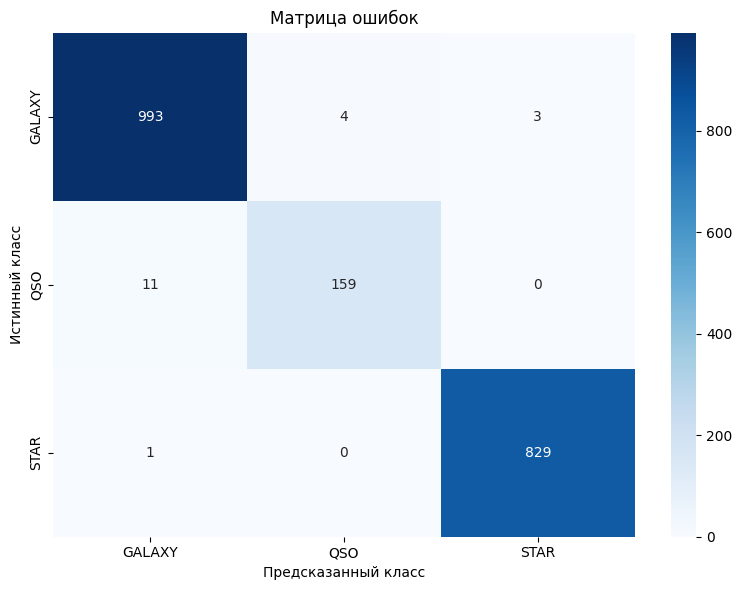

In [13]:
param_grid_h3 = {
    'max_depth': [grid_search_h2.best_params_['max_depth']],
    'min_samples_split': [grid_search_h2.best_params_['min_samples_split']],
    'min_samples_leaf': [grid_search_h2.best_params_['min_samples_leaf']],
    'criterion': [grid_search_h2.best_params_['criterion']],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7]
}

grid_search_h3 = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_h3,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search_h3.fit(X_train_class_h1_scaled, y_train_class_h1)

print(f"Лучшие параметры: {grid_search_h3.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_search_h3.best_score_:.4f}")

dt_classifier_h3 = grid_search_h3.best_estimator_
y_pred_class_h3 = dt_classifier_h3.predict(X_test_class_h1_scaled)

print("\nРезультаты гипотезы 3:")
class_metrics_h3 = evaluate_classification_model(y_test_class_h1, y_pred_class_h3, class_names)

Сравним результаты всех гипотез с базовой моделью

In [14]:
comparison_hypotheses_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Гипотеза 1', 'Гипотеза 2', 'Гипотеза 3'],
    'Accuracy': [
        class_metrics['accuracy'],
        class_metrics_h1['accuracy'],
        class_metrics_h2['accuracy'],
        class_metrics_h3['accuracy']
    ],
    'Macro F1': [
        class_metrics['macro_f1'],
        class_metrics_h1['macro_f1'],
        class_metrics_h2['macro_f1'],
        class_metrics_h3['macro_f1']
    ]
})

print("Сравнение результатов гипотез для классификации:")
print(comparison_hypotheses_class.to_string(index=False))

Сравнение результатов гипотез для классификации:
          Модель  Accuracy  Macro F1
Базовый бейзлайн    0.9885  0.978467
      Гипотеза 1    0.9900  0.980571
      Гипотеза 2    0.9905  0.981024
      Гипотеза 3    0.9905  0.981024


Сформируем улучшенный бейзлайн на основе лучшей гипотезы и обучим модель

Результаты улучшенного бейзлайна для классификации:
1. Accuracy: 0.9905

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.988060 0.993000  0.990524
   QSO   0.975460 0.935294  0.954955
  STAR   0.996394 0.998795  0.997593

3. Macro F1: 0.9810

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     993    4     3
QSO         11  159     0
STAR         1    0   829


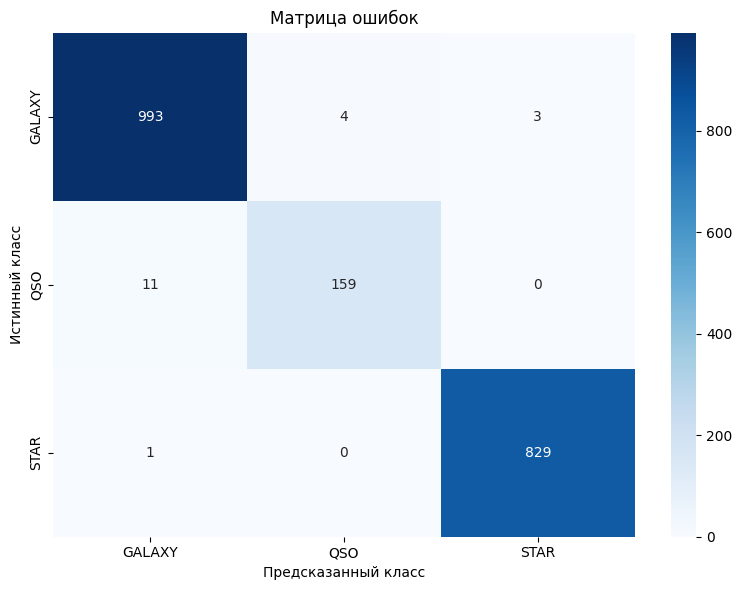

In [15]:
dt_classifier_improved = DecisionTreeClassifier(
    max_depth=grid_search_h3.best_params_['max_depth'],
    min_samples_split=grid_search_h3.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_h3.best_params_['min_samples_leaf'],
    criterion=grid_search_h3.best_params_['criterion'],
    max_features=grid_search_h3.best_params_['max_features'],
    random_state=42
)
dt_classifier_improved.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_improved = dt_classifier_improved.predict(X_test_class_h1_scaled)

print("Результаты улучшенного бейзлайна для классификации:")
class_metrics_improved = evaluate_classification_model(y_test_class_h1, y_pred_class_improved, class_names)

Сравним результаты улучшенного бейзлайна с базовым

In [16]:
comparison_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'Accuracy': [class_metrics['accuracy'], class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], class_metrics_improved['macro_f1']]
})

print("Сравнение базового и улучшенного бейзлайна для классификации:")
print(comparison_class.to_string(index=False))

Сравнение базового и улучшенного бейзлайна для классификации:
             Модель  Accuracy  Macro F1
   Базовый бейзлайн    0.9885  0.978467
Улучшенный бейзлайн    0.9905  0.981024


### Регрессия

**Гипотеза 1:** Добавление стандартизации признаков улучшит качество модели.

In [17]:
scaler_reg_h1 = StandardScaler()
X_train_reg_h1_scaled = scaler_reg_h1.fit_transform(X_train_reg)
X_test_reg_h1_scaled = scaler_reg_h1.transform(X_test_reg)

dt_regressor_h1 = DecisionTreeRegressor(random_state=42)
dt_regressor_h1.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_h1 = dt_regressor_h1.predict(X_test_reg_h1_scaled)

print("Результаты гипотезы 1:")
reg_metrics_h1 = evaluate_regression_model(y_test_reg, y_pred_reg_h1)

Результаты гипотезы 1:
1. MAE: 2.1603

2. MSE: 9.6459

3. RMSE: 3.1058

4. R²: 0.1089


**Гипотеза 2:** Подбор гиперпараметров на кросс-валидации улучшит качество модели.

In [18]:
param_grid_reg_h2 = {
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

dt_reg_for_tuning = DecisionTreeRegressor(random_state=42)
grid_search_reg_h2 = GridSearchCV(
    dt_reg_for_tuning,
    param_grid_reg_h2,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_reg_h2.fit(X_train_reg_h1_scaled, y_train_reg)

print("Лучшие параметры:")
for param, value in grid_search_reg_h2.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nЛучший MSE (кросс-валидация): {-grid_search_reg_h2.best_score_:.4f}")

dt_regressor_h2 = DecisionTreeRegressor(
    max_depth=grid_search_reg_h2.best_params_['max_depth'],
    min_samples_split=grid_search_reg_h2.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_reg_h2.best_params_['min_samples_leaf'],
    criterion=grid_search_reg_h2.best_params_['criterion'],
    random_state=42
)
dt_regressor_h2.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_h2 = dt_regressor_h2.predict(X_test_reg_h1_scaled)

print("\nРезультаты гипотезы 2:")
reg_metrics_h2 = evaluate_regression_model(y_test_reg, y_pred_reg_h2)

Лучшие параметры:
  criterion: squared_error
  max_depth: 5
  min_samples_leaf: 10
  min_samples_split: 2

Лучший MSE (кросс-валидация): 5.3595

Результаты гипотезы 2:
1. MAE: 1.6248

2. MSE: 5.3702

3. RMSE: 2.3174

4. R²: 0.5039


**Гипотеза 3:** Добавление параметра max_features для ограничения количества признаков при разбиении улучшит качество модели.

In [19]:
param_grid_reg_h3 = {
    'max_depth': [grid_search_reg_h2.best_params_['max_depth']],
    'min_samples_split': [grid_search_reg_h2.best_params_['min_samples_split']],
    'min_samples_leaf': [grid_search_reg_h2.best_params_['min_samples_leaf']],
    'criterion': [grid_search_reg_h2.best_params_['criterion']],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7]
}

grid_search_reg_h3 = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_reg_h3,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_reg_h3.fit(X_train_reg_h1_scaled, y_train_reg)

print(f"Лучшие параметры: {grid_search_reg_h3.best_params_}")
print(f"Лучший MSE на кросс-валидации: {-grid_search_reg_h3.best_score_:.4f}")

dt_regressor_h3 = grid_search_reg_h3.best_estimator_
y_pred_reg_h3 = dt_regressor_h3.predict(X_test_reg_h1_scaled)

print("\nРезультаты гипотезы 3:")
reg_metrics_h3 = evaluate_regression_model(y_test_reg, y_pred_reg_h3)

Лучшие параметры: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Лучший MSE на кросс-валидации: 5.3595

Результаты гипотезы 3:
1. MAE: 1.6248

2. MSE: 5.3702

3. RMSE: 2.3174

4. R²: 0.5039


Сравним результаты всех гипотез с базовой моделью

In [20]:
comparison_hypotheses_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Гипотеза 1', 'Гипотеза 2', 'Гипотеза 3'],
    'MAE': [
        reg_metrics['mae'],
        reg_metrics_h1['mae'],
        reg_metrics_h2['mae'],
        reg_metrics_h3['mae']
    ],
    'RMSE': [
        reg_metrics['rmse'],
        reg_metrics_h1['rmse'],
        reg_metrics_h2['rmse'],
        reg_metrics_h3['rmse']
    ],
    'R²': [
        reg_metrics['r2'],
        reg_metrics_h1['r2'],
        reg_metrics_h2['r2'],
        reg_metrics_h3['r2']
    ]
})

print("Сравнение результатов гипотез для регрессии:")
print(comparison_hypotheses_reg.to_string(index=False))

Сравнение результатов гипотез для регрессии:
          Модель      MAE     RMSE       R²
Базовый бейзлайн 2.178230 3.133589 0.092916
      Гипотеза 1 2.160287 3.105790 0.108938
      Гипотеза 2 1.624829 2.317374 0.503915
      Гипотеза 3 1.624829 2.317374 0.503915


Сформируем улучшенный бейзлайн на основе лучшей гипотезы и обучим модель

In [21]:
dt_regressor_improved = DecisionTreeRegressor(
    max_depth=grid_search_reg_h3.best_params_['max_depth'],
    min_samples_split=grid_search_reg_h3.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_reg_h3.best_params_['min_samples_leaf'],
    criterion=grid_search_reg_h3.best_params_['criterion'],
    max_features=grid_search_reg_h3.best_params_['max_features'],
    random_state=42
)
dt_regressor_improved.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_improved = dt_regressor_improved.predict(X_test_reg_h1_scaled)

print("Результаты улучшенного бейзлайна для регрессии:")
reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_reg_improved)

Результаты улучшенного бейзлайна для регрессии:
1. MAE: 1.6248

2. MSE: 5.3702

3. RMSE: 2.3174

4. R²: 0.5039


Сравним результаты улучшенного бейзлайна с базовым

In [22]:
comparison_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'MAE': [reg_metrics['mae'], reg_metrics_improved['mae']],
    'RMSE': [reg_metrics['rmse'], reg_metrics_improved['rmse']],
    'R²': [reg_metrics['r2'], reg_metrics_improved['r2']]
})

print("Сравнение базового и улучшенного бейзлайна для регрессии:")
print(comparison_reg.to_string(index=False))

Сравнение базового и улучшенного бейзлайна для регрессии:
             Модель      MAE     RMSE       R²
   Базовый бейзлайн 2.178230 3.133589 0.092916
Улучшенный бейзлайн 1.624829 2.317374 0.503915


## 4. Имплементация алгоритма машинного обучения

Перейдем к имлпементации алгоритмов

### Классификация

Реализуем алгоритм DecisionTree для классификации

In [23]:
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                 criterion='gini', max_features=None, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.max_features = max_features
        self.random_state = random_state
        self.tree = None
        self.n_features_ = None
        self.classes_ = None
        
    def _gini(self, y):
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)
    
    def _entropy(self, y):
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        probabilities = counts[counts > 0] / len(y)
        return -np.sum(probabilities * np.log2(probabilities))
    
    def _impurity(self, y):
        if self.criterion == 'gini':
            return self._gini(y)
        elif self.criterion == 'entropy':
            return self._entropy(y)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")
    
    def _best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        if self.max_features is not None:
            if isinstance(self.max_features, (int, float)):
                if isinstance(self.max_features, float):
                    n_features = max(1, int(self.max_features * n_features))
                else:
                    n_features = min(self.max_features, n_features)
            elif self.max_features == 'sqrt':
                n_features = int(np.sqrt(n_features))
            elif self.max_features == 'log2':
                n_features = int(np.log2(n_features))
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        features = np.random.choice(X.shape[1], n_features, replace=False)
        
        parent_impurity = self._impurity(y)
        
        for feature in features:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices
                
                if np.sum(left_indices) < self.min_samples_leaf or np.sum(right_indices) < self.min_samples_leaf:
                    continue
                
                left_impurity = self._impurity(y[left_indices])
                right_impurity = self._impurity(y[right_indices])
                
                n_left = np.sum(left_indices)
                n_right = np.sum(right_indices)
                n_total = len(y)
                
                weighted_impurity = (n_left / n_total) * left_impurity + (n_right / n_total) * right_impurity
                gain = parent_impurity - weighted_impurity
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain
    
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)
        n_classes = len(np.unique(y))
        
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           n_classes == 1:
            return {'class': np.bincount(y).argmax(), 'is_leaf': True}

        feature, threshold, gain = self._best_split(X, y)
        
        if feature is None or gain <= 0:
            return {'class': np.bincount(y).argmax(), 'is_leaf': True}

        left_indices = X[:, feature] <= threshold
        right_indices = ~left_indices
        
        if np.sum(left_indices) < self.min_samples_leaf or np.sum(right_indices) < self.min_samples_leaf:
            return {'class': np.bincount(y).argmax(), 'is_leaf': True}

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return {
            'feature': feature,
            'threshold': threshold,
            'left': left_tree,
            'right': right_tree,
            'is_leaf': False
        }
    
    def _predict_sample(self, x, node):
        if node['is_leaf']:
            return node['class']
        
        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.n_features_ = X.shape[1]
        self.classes_ = np.unique(y)
        
        self.tree = self._build_tree(X, y)
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.tree))
        return np.array(predictions)

Обучим имплементированную модель на исходных данных

Результаты имплементированной модели классификации:
1. Accuracy: 0.9875

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.987013 0.991968  0.989484
   QSO   0.941799 0.936842  0.939314
  STAR   0.998765 0.993857  0.996305

3. Macro F1: 0.9750

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     988    7     1
QSO         12  178     0
STAR         1    4   809


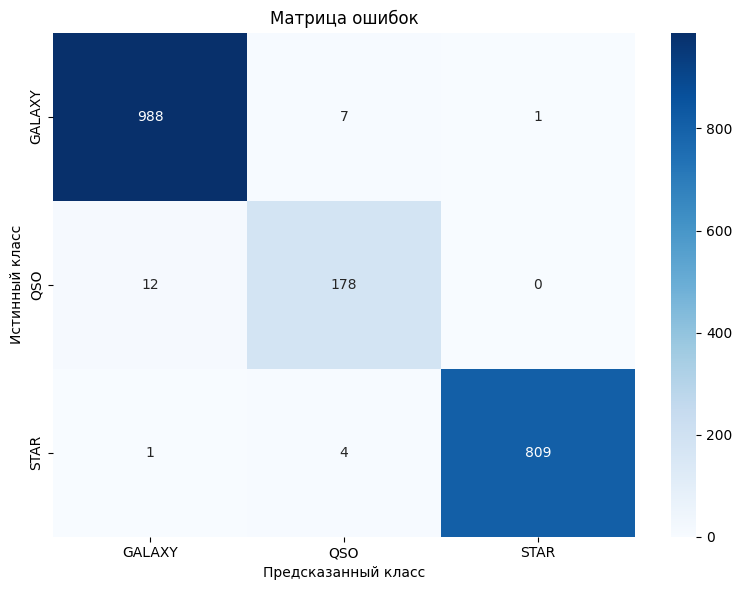

In [24]:
my_dt_classifier = MyDecisionTreeClassifier(random_state=42)
my_dt_classifier.fit(X_train_class.values, y_train_class)
y_pred_my_class = my_dt_classifier.predict(X_test_class.values)

print("Результаты имплементированной модели классификации:")
my_class_metrics = evaluate_classification_model(y_test_class, y_pred_my_class, class_names)

Сравним результаты имплементированной модели с базовым бейзлайном

In [25]:
comparison_my_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'Accuracy': [class_metrics['accuracy'], my_class_metrics['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], my_class_metrics['macro_f1']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_class.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель  Accuracy  Macro F1
Базовый бейзлайн (sklearn)    0.9885  0.978467
 Имплементированная модель    0.9875  0.975035


Теперь применим техники из улучшенного бейзлайна

Результаты имплементированной модели с улучшениями:
1. Accuracy: 0.9915

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.989055 0.994000  0.991521
   QSO   0.975460 0.935294  0.954955
  STAR   0.997596 1.000000  0.998797

3. Macro F1: 0.9818

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     994    4     2
QSO         11  159     0
STAR         0    0   830


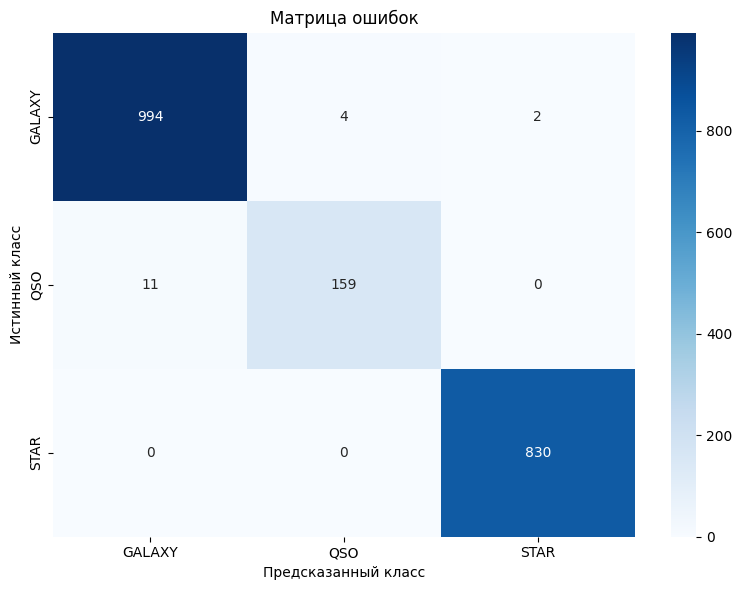

In [26]:
my_dt_classifier_improved = MyDecisionTreeClassifier(
    max_depth=grid_search_h3.best_params_['max_depth'],
    min_samples_split=grid_search_h3.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_h3.best_params_['min_samples_leaf'],
    criterion=grid_search_h3.best_params_['criterion'],
    max_features=grid_search_h3.best_params_['max_features'],
    random_state=42
)
my_dt_classifier_improved.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_my_class_improved = my_dt_classifier_improved.predict(X_test_class_h1_scaled)

print("Результаты имплементированной модели с улучшениями:")
my_class_metrics_improved = evaluate_classification_model(y_test_class_h1, y_pred_my_class_improved, class_names)

Сравним результаты имплементированной модели с улучшениями с улучшенным бейзлайном

In [27]:
comparison_my_class_improved = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'Accuracy': [class_metrics_improved['accuracy'], my_class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics_improved['macro_f1'], my_class_metrics_improved['macro_f1']]
})

print("Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:")
print(comparison_my_class_improved.to_string(index=False))

Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:
                                 Модель  Accuracy  Macro F1
          Улучшенный бейзлайн (sklearn)    0.9905  0.981024
Имплементированная модель с улучшениями    0.9915  0.981758


### Регрессия

Реализуем алгоритм DecisionTree для регрессии

In [28]:
class MyDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                 criterion='squared_error', max_features=None, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.max_features = max_features
        self.random_state = random_state
        self.tree = None
        self.n_features_ = None
    
    def _mse(self, y):
        if len(y) == 0:
            return 0
        mean = np.mean(y)
        return np.mean((y - mean) ** 2)
    
    def _mae(self, y):
        if len(y) == 0:
            return 0
        median = np.median(y)
        return np.mean(np.abs(y - median))
    
    def _impurity(self, y):
        if self.criterion == 'squared_error' or self.criterion == 'friedman_mse':
            return self._mse(y)
        elif self.criterion == 'absolute_error':
            return self._mae(y)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")
    
    def _best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        if self.max_features is not None:
            if isinstance(self.max_features, (int, float)):
                if isinstance(self.max_features, float):
                    n_features = max(1, int(self.max_features * n_features))
                else:
                    n_features = min(self.max_features, n_features)
            elif self.max_features == 'sqrt':
                n_features = int(np.sqrt(n_features))
            elif self.max_features == 'log2':
                n_features = int(np.log2(n_features))
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        features = np.random.choice(X.shape[1], n_features, replace=False)
        
        parent_impurity = self._impurity(y)
        
        for feature in features:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices
                
                if np.sum(left_indices) < self.min_samples_leaf or np.sum(right_indices) < self.min_samples_leaf:
                    continue
                
                left_impurity = self._impurity(y[left_indices])
                right_impurity = self._impurity(y[right_indices])
                
                n_left = np.sum(left_indices)
                n_right = np.sum(right_indices)
                n_total = len(y)
                
                weighted_impurity = (n_left / n_total) * left_impurity + (n_right / n_total) * right_impurity
                gain = parent_impurity - weighted_impurity
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain
    
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)
        
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split:
            return {'value': np.mean(y), 'is_leaf': True}
        
        feature, threshold, gain = self._best_split(X, y)
        
        if feature is None or gain <= 0:
            return {'value': np.mean(y), 'is_leaf': True}
        
        left_indices = X[:, feature] <= threshold
        right_indices = ~left_indices
        
        if np.sum(left_indices) < self.min_samples_leaf or np.sum(right_indices) < self.min_samples_leaf:
            return {'value': np.mean(y), 'is_leaf': True}
        
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return {
            'feature': feature,
            'threshold': threshold,
            'left': left_tree,
            'right': right_tree,
            'is_leaf': False
        }
    
    def _predict_sample(self, x, node):
        if node['is_leaf']:
            return node['value']
        
        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.n_features_ = X.shape[1]
        
        self.tree = self._build_tree(X, y)
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.tree))
        return np.array(predictions)

Обучим имплементированную модель на исходных данных

In [29]:
my_dt_regressor = MyDecisionTreeRegressor(random_state=42)
my_dt_regressor.fit(X_train_reg.values, y_train_reg.values)
y_pred_my_reg = my_dt_regressor.predict(X_test_reg.values)

print("Результаты имплементированной модели регрессии:")
my_reg_metrics = evaluate_regression_model(y_test_reg, y_pred_my_reg)

Результаты имплементированной модели регрессии:
1. MAE: 2.2165

2. MSE: 9.9677

3. RMSE: 3.1572

4. R²: 0.0792


Сравним результаты имплементированной модели с базовым бейзлайном

In [30]:
comparison_my_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'MAE': [reg_metrics['mae'], my_reg_metrics['mae']],
    'RMSE': [reg_metrics['rmse'], my_reg_metrics['rmse']],
    'R²': [reg_metrics['r2'], my_reg_metrics['r2']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_reg.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель      MAE     RMSE       R²
Базовый бейзлайн (sklearn) 2.178230 3.133589 0.092916
 Имплементированная модель 2.216507 3.157167 0.079214


Теперь применим техники из улучшенного бейзлайна

In [31]:
my_dt_regressor_improved = MyDecisionTreeRegressor(
    max_depth=grid_search_reg_h3.best_params_['max_depth'],
    min_samples_split=grid_search_reg_h3.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_reg_h3.best_params_['min_samples_leaf'],
    criterion=grid_search_reg_h3.best_params_['criterion'],
    max_features=grid_search_reg_h3.best_params_['max_features'],
    random_state=42
)
my_dt_regressor_improved.fit(X_train_reg_h1_scaled, y_train_reg.values)
y_pred_my_reg_improved = my_dt_regressor_improved.predict(X_test_reg_h1_scaled)

print("Результаты имплементированной модели с улучшениями:")
my_reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_my_reg_improved)

Результаты имплементированной модели с улучшениями:
1. MAE: 1.6260

2. MSE: 5.3718

3. RMSE: 2.3177

4. R²: 0.5038


Сравним результаты имплементированной модели с улучшениями с улучшенным бейзлайном

In [32]:
comparison_my_reg_improved = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'MAE': [reg_metrics_improved['mae'], my_reg_metrics_improved['mae']],
    'RMSE': [reg_metrics_improved['rmse'], my_reg_metrics_improved['rmse']],
    'R²': [reg_metrics_improved['r2'], my_reg_metrics_improved['r2']]
})

print("Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:")
print(comparison_my_reg_improved.to_string(index=False))

Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:
                                 Модель      MAE     RMSE       R²
          Улучшенный бейзлайн (sklearn) 1.624829 2.317374 0.503915
Имплементированная модель с улучшениями 1.625966 2.317720 0.503767


## Общие выводы по результатам всех моделей

Сравним все 4 модели для классификации и регрессии: базовый бейзлайн из sklearn, имплементированную модель базового бейзлайна, модель с улучшенным бейзлайном из sklearn и имплементированную модель улучшенного бейзлайна.

### Классификация

In [33]:
final_comparison_class = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'Accuracy': [
        class_metrics['accuracy'],
        my_class_metrics['accuracy'],
        class_metrics_improved['accuracy'],
        my_class_metrics_improved['accuracy']
    ],
    'Macro F1': [
        class_metrics['macro_f1'],
        my_class_metrics['macro_f1'],
        class_metrics_improved['macro_f1'],
        my_class_metrics_improved['macro_f1']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ")
print(final_comparison_class.to_string(index=False))

print("\nВЫВОДЫ ПО КЛАССИФИКАЦИИ:")
print(f"1. Базовый бейзлайн (sklearn): Accuracy = {class_metrics['accuracy']:.4f}, Macro F1 = {class_metrics['macro_f1']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: Accuracy = {my_class_metrics['accuracy']:.4f}, Macro F1 = {my_class_metrics['macro_f1']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): Accuracy = {class_metrics_improved['accuracy']:.4f}, Macro F1 = {class_metrics_improved['macro_f1']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: Accuracy = {my_class_metrics_improved['accuracy']:.4f}, Macro F1 = {my_class_metrics_improved['macro_f1']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  Accuracy: {((class_metrics_improved['accuracy'] - class_metrics['accuracy']) / class_metrics['accuracy'] * 100):.2f}%")
print(f"  Macro F1: {((class_metrics_improved['macro_f1'] - class_metrics['macro_f1']) / class_metrics['macro_f1'] * 100):.2f}%")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в Accuracy: {abs(class_metrics_improved['accuracy'] - my_class_metrics_improved['accuracy']):.6f}")
print(f"  Разница в Macro F1: {abs(class_metrics_improved['macro_f1'] - my_class_metrics_improved['macro_f1']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ
                                         Модель  Accuracy  Macro F1
                     Базовый бейзлайн (sklearn)    0.9885  0.978467
   Имплементированная модель базового бейзлайна    0.9875  0.975035
                  Улучшенный бейзлайн (sklearn)    0.9905  0.981024
Имплементированная модель улучшенного бейзлайна    0.9915  0.981758

ВЫВОДЫ ПО КЛАССИФИКАЦИИ:
1. Базовый бейзлайн (sklearn): Accuracy = 0.9885, Macro F1 = 0.9785
2. Имплементированная модель базового бейзлайна: Accuracy = 0.9875, Macro F1 = 0.9750
3. Улучшенный бейзлайн (sklearn): Accuracy = 0.9905, Macro F1 = 0.9810
4. Имплементированная модель улучшенного бейзлайна: Accuracy = 0.9915, Macro F1 = 0.9818

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  Accuracy: 0.20%
  Macro F1: 0.26%

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в Accuracy: 0.001000
  Разница в Macro F1: 0.000734


### Регрессия

In [34]:
final_comparison_reg = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'MAE': [
        reg_metrics['mae'],
        my_reg_metrics['mae'],
        reg_metrics_improved['mae'],
        my_reg_metrics_improved['mae']
    ],
    'RMSE': [
        reg_metrics['rmse'],
        my_reg_metrics['rmse'],
        reg_metrics_improved['rmse'],
        my_reg_metrics_improved['rmse']
    ],
    'R²': [
        reg_metrics['r2'],
        my_reg_metrics['r2'],
        reg_metrics_improved['r2'],
        my_reg_metrics_improved['r2']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ")
print(final_comparison_reg.to_string(index=False))

print("\nВЫВОДЫ ПО РЕГРЕССИИ:")
print(f"1. Базовый бейзлайн (sklearn): MAE = {reg_metrics['mae']:.4f}, RMSE = {reg_metrics['rmse']:.4f}, R² = {reg_metrics['r2']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: MAE = {my_reg_metrics['mae']:.4f}, RMSE = {my_reg_metrics['rmse']:.4f}, R² = {my_reg_metrics['r2']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): MAE = {reg_metrics_improved['mae']:.4f}, RMSE = {reg_metrics_improved['rmse']:.4f}, R² = {reg_metrics_improved['r2']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: MAE = {my_reg_metrics_improved['mae']:.4f}, RMSE = {my_reg_metrics_improved['rmse']:.4f}, R² = {my_reg_metrics_improved['r2']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  MAE: {((reg_metrics['mae'] - reg_metrics_improved['mae']) / reg_metrics['mae'] * 100):.2f}% улучшение")
print(f"  RMSE: {((reg_metrics['rmse'] - reg_metrics_improved['rmse']) / reg_metrics['rmse'] * 100):.2f}% улучшение")
print(f"  R²: {((reg_metrics_improved['r2'] - reg_metrics['r2']) / abs(reg_metrics['r2']) * 100):.2f}% улучшение")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в MAE: {abs(reg_metrics_improved['mae'] - my_reg_metrics_improved['mae']):.6f}")
print(f"  Разница в RMSE: {abs(reg_metrics_improved['rmse'] - my_reg_metrics_improved['rmse']):.6f}")
print(f"  Разница в R²: {abs(reg_metrics_improved['r2'] - my_reg_metrics_improved['r2']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ
                                         Модель      MAE     RMSE       R²
                     Базовый бейзлайн (sklearn) 2.178230 3.133589 0.092916
   Имплементированная модель базового бейзлайна 2.216507 3.157167 0.079214
                  Улучшенный бейзлайн (sklearn) 1.624829 2.317374 0.503915
Имплементированная модель улучшенного бейзлайна 1.625966 2.317720 0.503767

ВЫВОДЫ ПО РЕГРЕССИИ:
1. Базовый бейзлайн (sklearn): MAE = 2.1782, RMSE = 3.1336, R² = 0.0929
2. Имплементированная модель базового бейзлайна: MAE = 2.2165, RMSE = 3.1572, R² = 0.0792
3. Улучшенный бейзлайн (sklearn): MAE = 1.6248, RMSE = 2.3174, R² = 0.5039
4. Имплементированная модель улучшенного бейзлайна: MAE = 1.6260, RMSE = 2.3177, R² = 0.5038

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  MAE: 25.41% улучшение
  RMSE: 26.05% улучшение
  R²: 442.34% улучшение

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в MAE: 0